# PRESELECCIÓN DE VARIABLES

## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

## IMPORTAR LOS DATOS

### Cargar los datos

In [2]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df.head()

,year_2012,year_2013,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,...,mes_11,mes_12,year_te_mms,mes_te_mms,age_mms,distance_station_mms,stores_mms,latitude_mms,longitude_mms,price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.078202,0.749415,0.005549,1.0,0.616941,0.714301,37.9
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.078202,0.456674,0.040484,0.9,0.584949,0.706289,42.2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.319701,0.311475,0.080724,0.5,0.671231,0.754582,47.3
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.140970,0.311475,0.080724,0.5,0.671231,0.754582,54.8
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.513659,0.475410,0.037491,0.6,0.585919,0.736692,46.7


### Separar predictoras y target

In [3]:
x = df.drop(columns= 'price').copy()
y = df.price.copy()

## MÉTODOS SUPERVISADOS

### MUTUAL INFORMATION

#### Crear función para mostrar resultado

In [4]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index= x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending= False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return (ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,10))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable, fontsize= 8)
        return(g)

#### Calcular y revisar

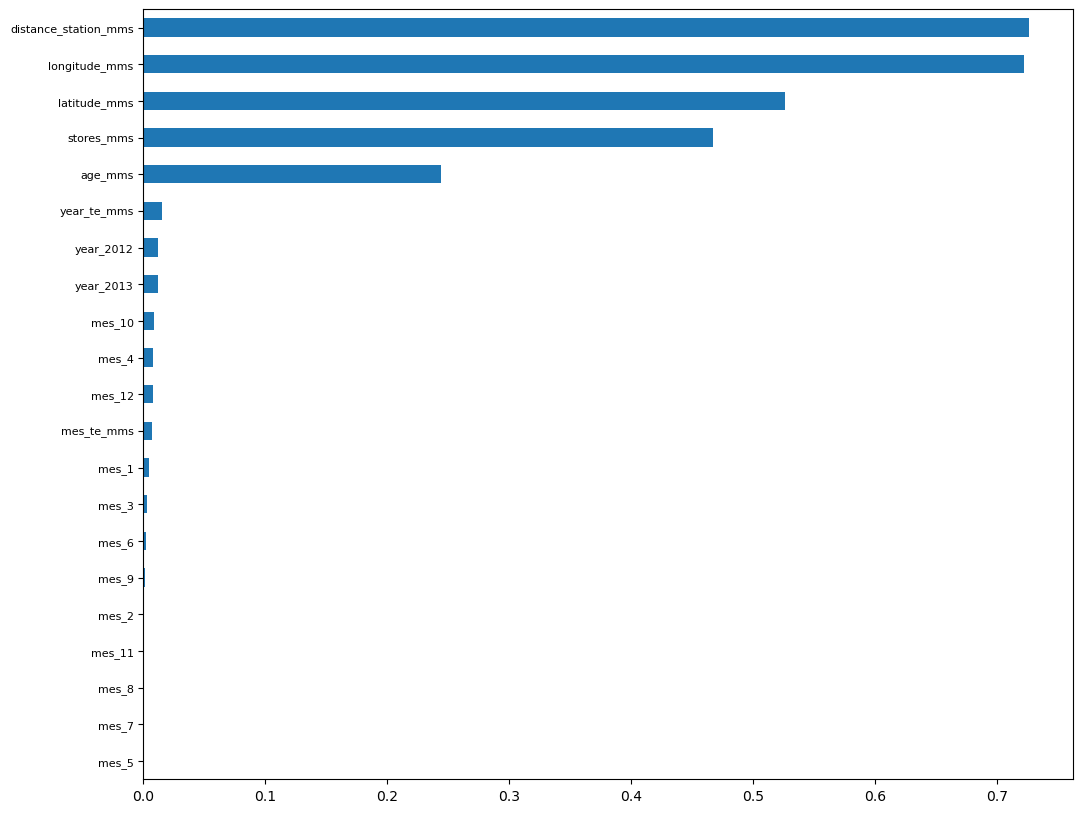

In [5]:
mutual_selector = mutual_info_regression(x,y)
rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [6]:
posicion_variable_limite = 6

##### Extrar los nombres de las que entran

In [7]:
entrar_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite]
entrar_mi

,variable,importancia_mi,ranking_mi
17,distance_station_mms,0.726457,0
20,longitude_mms,0.722227,1
19,latitude_mms,0.526240,2
18,stores_mms,0.467398,3
16,age_mms,0.243811,4
14,year_te_mms,0.015122,5


In [8]:
entrar_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable
entrar_mi

17    distance_station_mms
20           longitude_mms
19            latitude_mms
18              stores_mms
16                 age_mms
14             year_te_mms
Name: variable, dtype: object

##### Crear el dataframe con la selección

In [9]:
x_mi = x[entrar_mi].copy()
x_mi

,distance_station_mms,longitude_mms,latitude_mms,stores_mms,age_mms,year_te_mms
0,0.005549,0.714301,0.616941,1.0,0.749415,0.0
1,0.040484,0.706289,0.584949,0.9,0.456674,0.0
2,0.080724,0.754582,0.671231,0.5,0.311475,1.0
3,0.080724,0.754582,0.671231,0.5,0.311475,1.0
4,0.037491,0.736692,0.585919,0.6,0.475410,1.0
...,...,...,...,...,...,...
284,0.334994,0.409066,0.378454,0.3,0.433255,1.0
285,0.635354,0.314455,0.114881,0.0,0.320843,1.0
286,0.053778,0.710131,0.571498,0.7,0.440281,1.0
287,0.008690,0.719021,0.420141,0.5,0.189696,1.0


### RECURSIVE FEATURE ELIMINATION

#### Instanciar

In [10]:
rfe = RFECV(estimator= XGBRegressor(n_jobs = -1, eval_metric = 'merror'), step= 3, cv=3, min_features_to_select= 3)

#### Entrenar

In [11]:
rfe.fit(x,y)

RFECV(cv=3,
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, early_stopping_rounds=None,
                             enable_categorical=False, eval_metric='merror',
                             feature_types=None, gamma=None, gpu_id=None,
                             grow_policy=None, importance_type=None,
                             interaction_constraints=None, learning_rate=None,
                             max_bin=None, max_cat_threshold=None,
                             max_cat_to_onehot=None, max_delta_step=None,
                             max_depth=None, max_leaves=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, n_estimators=100,
                             n_jobs=-1, num_parallel_tree=None, predictor=None,
                             random_state=None, ...),
      min_features_to_select=3, step=3)

In [12]:
pd.DataFrame(rfe.cv_results_).sort_values(by= 'mean_test_score')


,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score
1,0.716472,0.030790,0.759637,0.689931,0.699847
6,0.721802,0.048085,0.746250,0.764533,0.654624
5,0.722099,0.054728,0.750675,0.770104,0.645519
0,0.724446,0.013368,0.743009,0.712061,0.718267
3,0.733073,0.069268,0.763850,0.798225,0.637145
2,0.735933,0.028706,0.746720,0.764434,0.696646
4,0.736095,0.069829,0.767922,0.801141,0.639222


### Extraer loo nombres de las que entran

In [13]:
entran_rfe = x.columns[rfe.support_]
entran_rfe

Index(['year_2012', 'mes_1', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9',
       'mes_10', 'mes_12', 'mes_te_mms', 'age_mms', 'distance_station_mms',
       'stores_mms', 'latitude_mms', 'longitude_mms'],
      dtype='object')

In [14]:
x_rfe = x[entran_rfe].copy()
x_rfe.head()

,year_2012,mes_1,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_12,mes_te_mms,age_mms,distance_station_mms,stores_mms,latitude_mms,longitude_mms
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.078202,0.749415,0.005549,1.0,0.616941,0.714301
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.078202,0.456674,0.040484,0.9,0.584949,0.706289
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.319701,0.311475,0.080724,0.5,0.671231,0.754582
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.140970,0.311475,0.080724,0.5,0.671231,0.754582
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.513659,0.475410,0.037491,0.6,0.585919,0.736692


### PERMUTATION IMPORTANCE

#### Crear una función para mostrar el resultado

In [15]:
def ranking_per(predictoras, permutacion):
    ranking_per = pd.DataFrame({'variable':predictoras.columns, 'importancia_per':permutacion.importances_mean}).sort_values(by='importancia_per', ascending= False)
    ranking_per['ranking_per'] =  np.arange(0, ranking_per.shape[0])
    return ranking_per

#### Instanciar y entrenar

In [16]:
import warnings
warnings.filterwarnings(action= 'ignore', message = r'.*Use subset.*of np.ndarray is not recommended')
xgb = XGBRegressor(use_label_encoder = False, n_jobs= -1, eval_metric = 'auc')
xgb.fit(x,y)
permutacion = permutation_importance(xgb, 
                                     x, y,
                                     scoring= 'neg_mean_absolute_error',
                                     n_repeats= 5,
                                     n_jobs= -1)

#### Revisarla salida

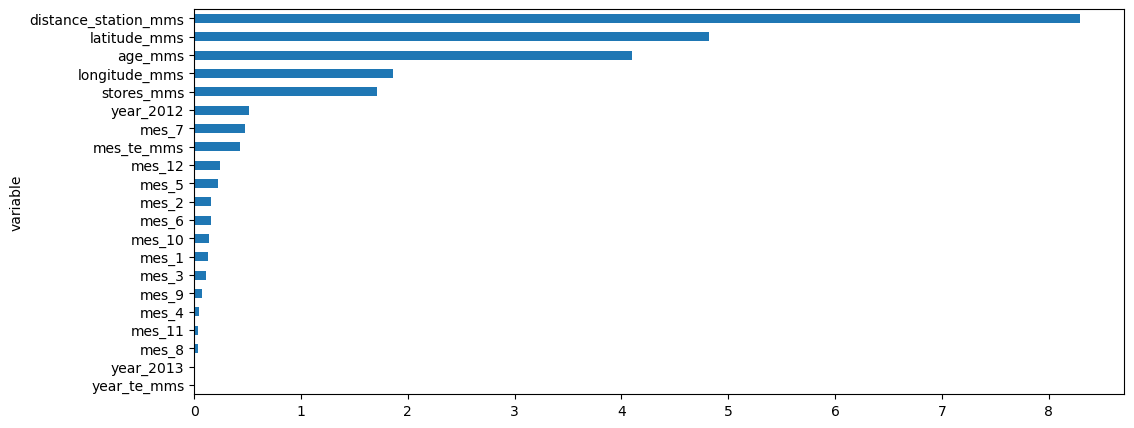

In [17]:
rank_per = ranking_per(x, permutacion)
rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,5));

In [18]:
rank_per

,variable,importancia_per,ranking_per
17,distance_station_mms,8.292366,0
19,latitude_mms,4.817078,1
16,age_mms,4.094968,2
20,longitude_mms,1.858160,3
18,stores_mms,1.715343,4
0,year_2012,0.511280,5
8,mes_7,0.478764,6
15,mes_te_mms,0.429212,7
13,mes_12,0.245780,8
6,mes_5,0.218889,9


#### Revisar las variables que pasan

##### Definir la posición de la última variable que a a entrar

In [19]:
posicion_variable_limite = 14

##### Extraer los nombres de las que entran

In [20]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable
entran_per

17    distance_station_mms
19            latitude_mms
16                 age_mms
20           longitude_mms
18              stores_mms
0                year_2012
8                    mes_7
15              mes_te_mms
13                  mes_12
6                    mes_5
3                    mes_2
7                    mes_6
11                  mes_10
2                    mes_1
Name: variable, dtype: object

##### crear el dataframe con la selección

In [21]:
x_per = x[entran_per].copy()
x_per.head()

,distance_station_mms,latitude_mms,age_mms,longitude_mms,stores_mms,year_2012,mes_7,mes_te_mms,mes_12,mes_5,mes_2,mes_6,mes_10,mes_1
0,0.005549,0.616941,0.749415,0.714301,1.0,1.0,0.0,0.078202,1.0,0.0,0.0,0.0,0.0,0.0
1,0.040484,0.584949,0.456674,0.706289,0.9,1.0,0.0,0.078202,1.0,0.0,0.0,0.0,0.0,0.0
2,0.080724,0.671231,0.311475,0.754582,0.5,0.0,0.0,0.319701,0.0,0.0,0.0,0.0,0.0,0.0
3,0.080724,0.671231,0.311475,0.754582,0.5,0.0,1.0,0.140970,0.0,0.0,0.0,0.0,0.0,0.0
4,0.037491,0.585919,0.475410,0.736692,0.6,0.0,0.0,0.513659,0.0,0.0,0.0,1.0,0.0,0.0


## SELECCIONAR EL MÉTODO FINAL (ANTERIORES)

In [22]:
x_preselecionado = x_mi
x_preselecionado.head()

,distance_station_mms,longitude_mms,latitude_mms,stores_mms,age_mms,year_te_mms
0,0.005549,0.714301,0.616941,1.0,0.749415,0.0
1,0.040484,0.706289,0.584949,0.9,0.456674,0.0
2,0.080724,0.754582,0.671231,0.5,0.311475,1.0
3,0.080724,0.754582,0.671231,0.5,0.311475,1.0
4,0.037491,0.736692,0.585919,0.6,0.475410,1.0


## MÉTODOS NO SUPERVISADOS

### CORRELACIÓN

#### Crear una función para mostrar el resultado

In [23]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1, drop_dupli = True):
    #Calcula la matriz de correlación
    c= df.corr().abs()
    c= c.unstack()
    c= pd.DataFrame(c).reset_index()
    c.columns = ['var1', 'var2', 'corr']
    c = c.loc[(c['corr'] > lim_inf) & (c['corr'] < lim_sup), :].sort_values(by= 'corr', ascending= False)
    c = c if drop_dupli == False else c.drop_duplicates(subset= ['corr'])
    return c


#### Calcular

In [24]:
cor_finales = correlaciones_fuertes(x_preselecionado)

#### Revisar Agregado

In [25]:
cor_finales.var1.value_counts()

distance_station_mms    3
longitude_mms           2
latitude_mms            1
Name: var1, dtype: int64

#### Revisar detalle

In [26]:
cor_finales.head(50)

,var1,var2,corr
1,distance_station_mms,longitude_mms,0.777707
3,distance_station_mms,stores_mms,0.646154
2,distance_station_mms,latitude_mms,0.586001
15,latitude_mms,stores_mms,0.457066
9,longitude_mms,stores_mms,0.433646
8,longitude_mms,latitude_mms,0.387364


## SELECCIONAR VARIABLES A ELIMINAR

In [27]:
x_preselecionado.columns

Index(['distance_station_mms', 'longitude_mms', 'latitude_mms', 'stores_mms',
       'age_mms', 'year_te_mms'],
      dtype='object')

#### Filtrar variables

In [28]:
a_eliminar = ['longitude_mms']
x_preselecionado.drop(columns= a_eliminar, inplace= True)
x_preselecionado.columns.to_list()

['distance_station_mms',
 'latitude_mms',
 'stores_mms',
 'age_mms',
 'year_te_mms']

### GUARDAR DATASETS TRAS PRESELECCIÓN DE VARIABLES

#### Definir los nombres de los archivos

In [29]:
nombre_x_preselecionado = '../../02_Datos/03_Trabajo/' + 'x_preselecionado.pickle'
nombre_y_preselecionado = '../../02_Datos/03_Trabajo/' + 'y_preselecionado.pickle'

#### Guardar los Datasets

In [30]:
#Predictoras
x_preselecionado.to_pickle(nombre_x_preselecionado)

#Target
y_preselecionado = y.copy()
y_preselecionado.to_pickle(nombre_y_preselecionado)

#### Guardar los nombres de las variables finales

In [31]:
x_preselecionado.columns.to_list()

nombre_variables_finales = '../../02_Datos/03_Trabajo/' + 'variables_finales.pickle'
x_preselecionado.iloc[:0].to_pickle(nombre_variables_finales)